In [1]:
import numpy as np
from analysis import constants as c, functions as f, components as cmp

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def mdot(p, A_t, Gamma, R, T_c):
    """
    Mass flow function.

    Accepts type `np.array` for `p` and `T_c`
    """
    return (p*A_t*Gamma) / np.sqrt(R*T_c)

def p_t(V_0, p_0, m_exit_t, rho):
    """
    Pressure vs time function.
    """
    return (V_0 * p_0) / (V_0 + (m_exit_t/rho))

In [6]:
p_0 = np.arange(1., 2.2, 0.4)*1e5
T_c0 = c.h_vap*c.T_vap0/(c.T_vap0*c.R_vap*np.log(c.p_vap0/p_0)+c.h_vap)
m_0 = p_0*c.A_t*c.Gamma/(np.sqrt(c.R*T_c0))
V_0 = 0.1*c.V_tube

sim_dim = (len(p_0), len(c.t))

m = np.zeros(sim_dim)
p = np.zeros(sim_dim)
temp = np.zeros(sim_dim)

m[:, 0] = m_0
p[:, 0] = p_0

T_c = 600

In [7]:
m[:, 0]

array([7.27853909e-07, 1.00557313e-06, 1.27983830e-06, 1.55140175e-06])

In [8]:
%%time
for ii in range(1,len(c.t)):
    p[:,ii] = V_0*p_0/(V_0+temp[:,ii-1])
    m[:,ii] = mdot(p[:,ii-1], c.A_t, c.Gamma, c.R, T_c)
    temp[:,ii] = temp[:,ii-1]+m[:,ii]*c.dt/c.rho

T_vap = c.h_vap*c.T_vap0/(c.T_vap0*c.R_vap*np.log(c.p_vap0/p)+c.h_vap)

Wall time: 858 ms


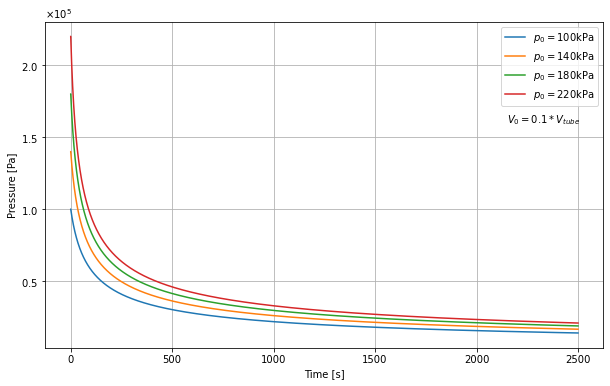

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

for i in p:
    ax.plot(
        c.t, 
        i[:],
        label=f'$p_0=${i[0]/1e3:.0f}kPa'
        )

ax.set_xlabel('Time [s]')
ax.set_ylabel('Pressure [Pa]')
ax.text(2150, 1.6e5, '$V_0 = 0.1*V_{tube}$')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
ax.legend()
ax.grid()

In [14]:
fig.savefig('figures/p_t_0.1V.pdf')